The Decision Tree model has given Accuracy of: 100.000%


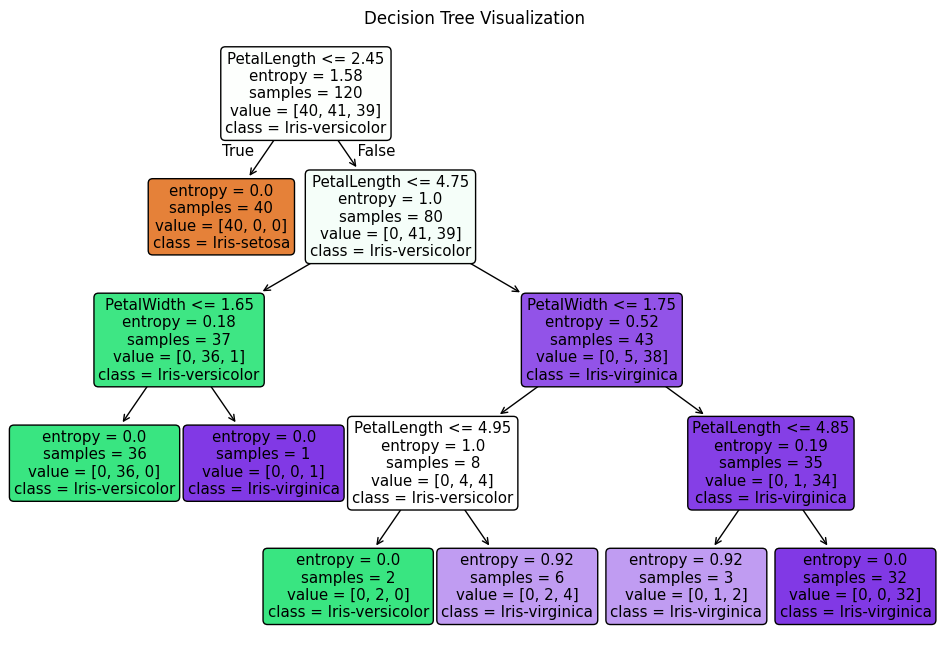

Predictions: ['Iris-versicolor' 'Iris-setosa' 'Iris-virginica' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-setosa' 'Iris-versicolor' 'Iris-virginica'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-virginica' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-versicolor'
 'Iris-virginica' 'Iris-versicolor' 'Iris-versicolor' 'Iris-virginica'
 'Iris-setosa' 'Iris-virginica' 'Iris-setosa' 'Iris-virginica'
 'Iris-virginica' 'Iris-virginica' 'Iris-virginica' 'Iris-virginica'
 'Iris-setosa' 'Iris-setosa']


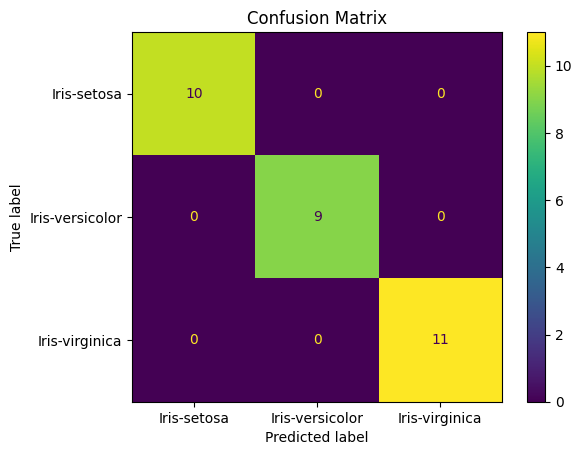

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
from sklearn import tree

# Load the dataset (Iris dataset)
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
columns = ['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth', 'Species']
data = pd.read_csv(url, names=columns)

# Prepare the input and output
X = data.iloc[:, :-1].values  # Features (all except 'Species')
Y = data.iloc[:, -1].values    # Target ('Species')

# Split the dataset into training and testing sets (80-20 split)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Initialize and train the Decision Tree classifier with specific parameters
algo = DecisionTreeClassifier(criterion="entropy", random_state=42, max_depth=4, min_samples_leaf=1)
algo.fit(X_train, Y_train)

# Model accuracy
result = algo.score(X_test, Y_test)
print("The Decision Tree model has given Accuracy of: %.3f%%" % (result * 100.0))

# Visualize the Decision Tree with attribute names and decisions at leaf nodes
plt.figure(figsize=(12, 8))
tree.plot_tree(algo, filled=True, feature_names=columns[:-1], class_names=data['Species'].unique(),
               rounded=True, precision=2)
plt.title("Decision Tree Visualization")
plt.show()

# Make predictions on the test set
Y_pred = algo.predict(X_test)
print("Predictions:", Y_pred)

# Confusion Matrix
cf_mtrx = metrics.confusion_matrix(Y_test, Y_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix=cf_mtrx, display_labels=data['Species'].unique())
cm_display.plot()
plt.title("Confusion Matrix")
plt.show()

# Classification report
print(classification_report(Y_test, Y_pred))
